In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Desabilitar Notacao Científica e deixar com 2 casas decimais
pd.set_option('display.float_format', '{:,.2f}'.format)

In [3]:
df = pd.read_csv('MICRODADOS_ENEM_2019.csv', sep=';',  encoding='latin-1')

In [4]:
df.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001595656,2019,3552205,Sorocaba,35,SP,36.00,M,1,3,...,A,A,A,A,A,A,C,A,C,B
1,190001421546,2019,2910800,Feira de Santana,29,BA,23.00,M,1,1,...,A,A,A,B,A,A,E,A,A,B
2,190001133210,2019,2304400,Fortaleza,23,CE,39.00,F,1,3,...,A,A,A,B,A,A,C,A,A,B
3,190001199383,2019,1721000,Palmas,17,TO,25.00,F,1,1,...,A,A,A,C,A,B,D,A,B,B
4,190001237802,2019,3118601,Contagem,31,MG,22.00,F,1,1,...,B,A,A,B,A,A,C,B,B,B


In [131]:
print('Data Frame df contendo',df.shape[0],'linhas e',df.shape[1],'colunas')

Data Frame df contendo 5095270 linhas e 136 colunas


In [9]:
df.dtypes

NU_INSCRICAO                int64
NU_ANO                      int64
CO_MUNICIPIO_RESIDENCIA     int64
NO_MUNICIPIO_RESIDENCIA    object
CO_UF_RESIDENCIA            int64
                            ...  
Q021                       object
Q022                       object
Q023                       object
Q024                       object
Q025                       object
Length: 136, dtype: object

In [68]:
# Selecionando as 12 variáveis que iremos utilizar
enem_2019 = df[['SG_UF_RESIDENCIA','NU_IDADE','TP_SEXO','TP_COR_RACA',
                'NU_NOTA_MT','NU_NOTA_CH','NU_NOTA_REDACAO','NU_NOTA_CN', ''
         'Q025','Q001', 
         'Q006','Q002']]
print('Data Frame contendo',enem_2019.shape[0],'linhas e',enem_2019.shape[1],'colunas')

Data Frame contendo 5095270 linhas e 12 colunas


In [69]:
enem_2019.head()

,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,NU_NOTA_MT,NU_NOTA_CH,NU_NOTA_REDACAO,NU_NOTA_CN,Q025,Q001,Q006,Q002
0,SP,36.00,M,3,NaN,NaN,NaN,NaN,B,B,A,B
1,BA,23.00,M,1,NaN,NaN,NaN,NaN,B,C,C,E
2,CE,39.00,F,3,NaN,NaN,NaN,NaN,B,E,B,E
3,TO,25.00,F,1,392.00,503.60,460.00,483.80,B,C,E,E
4,MG,22.00,F,1,677.00,575.50,860.00,513.60,B,E,G,E


In [70]:
# Percentual de Nulos (missings) por coluna
pd.DataFrame({'tipos':enem_2019.dtypes, 'missing':enem_2019.isna().sum()})

,tipos,missing
SG_UF_RESIDENCIA,object,0
NU_IDADE,float64,69
TP_SEXO,object,0
TP_COR_RACA,int64,0
NU_NOTA_MT,float64,1384837
NU_NOTA_CH,float64,1172125
NU_NOTA_REDACAO,float64,1172126
NU_NOTA_CN,float64,1384837
Q025,object,0
Q001,object,0


In [214]:
# Foram excluídos candidatos faltantes em pelo menos uma prova
enem =enem_2019.dropna()
print('Data Frame enem contendo',enem.shape[0],'linhas e',enem.shape[1],'colunas')

Data Frame enem contendo 3701947 linhas e 12 colunas


In [215]:
# Percentual de Nulos (missings) por coluna
pd.DataFrame({'tipos':enem.dtypes, 'missing':enem.isna().sum()})

,tipos,missing
SG_UF_RESIDENCIA,object,0
NU_IDADE,float64,0
TP_SEXO,object,0
TP_COR_RACA,int64,0
NU_NOTA_MT,float64,0
NU_NOTA_CH,float64,0
NU_NOTA_REDACAO,float64,0
NU_NOTA_CN,float64,0
Q025,object,0
Q001,object,0


In [134]:
enem.tail()

,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,NU_NOTA_MT,NU_NOTA_CH,NU_NOTA_REDACAO,NU_NOTA_CN,Q025,Q001,Q006,Q002
5095257,MT,20.00,M,1,531.10,427.30,540.00,391.20,B,B,G,E
5095259,PI,37.00,F,4,423.40,485.90,480.00,414.60,A,A,C,A
5095260,SP,17.00,F,1,390.70,407.40,460.00,370.30,A,E,B,E
5095263,PA,33.00,F,3,498.30,507.80,540.00,499.60,A,H,E,E
5095264,SP,17.00,F,3,389.50,475.00,280.00,409.00,B,H,D,E


#  Tratando Variáveis 

In [137]:
enem['TP_COR_RACA'] = enem['TP_COR_RACA'].map({0:'NA', 6:'NA', 1:'Branca', 2:'Preta', 3:'Parda',
                                               4:'Amarela', 5:'Indígena'})

C:\Users\Carlos\AppData\Local\Temp/ipykernel_7676/2682213625.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  enem['TP_COR_RACA'] = enem['TP_COR_RACA'].map({0:'NA', 6:'NA', 1:'Branca', 2:'Preta', 3:'Parda',


In [138]:
# Questão 25 : Possui internet em casa?
enem['Q025'] = enem['Q025'].map({'A':'Não', 'B':'Sim'})

C:\Users\Carlos\AppData\Local\Temp/ipykernel_7676/508930023.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  enem['Q025'] = enem['Q025'].map({'A':'Não', 'B':'Sim'})


In [139]:
# Questão 2 : Escolaridade da mãe
enem['Q002'] = enem['Q002'].map({'A':'Nunca estudou', 'B':'Não completou EF', 'C':'Não completou EF',
                                'D':'Não completou EM', 'E':'Não completou ES', 'F':'Graduada',
                                'G':'Pós-graduada','H':'Não sabe'})

C:\Users\Carlos\AppData\Local\Temp/ipykernel_7676/1421352271.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  enem['Q002'] = enem['Q002'].map({'A':'Nunca estudou', 'B':'Não completou EF', 'C':'Não completou EF',


In [140]:
# Questão 1 : Escolaridade do pai
enem['Q001'] = enem['Q001'].map({'A':'Nunca estudou', 'B':'Não completou EF', 'C':'Não completou EF',
                                'D':'Não completou EM', 'E':'Não completou ES', 'F':'Graduada',
                                'G':'Pós-graduada','H':'Não sabe'})

C:\Users\Carlos\AppData\Local\Temp/ipykernel_7676/1871894960.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  enem['Q001'] = enem['Q001'].map({'A':'Nunca estudou', 'B':'Não completou EF', 'C':'Não completou EF',


In [141]:
# Questão 6 : Renda familiar (incluindo a do aluno)
enem['Q006'] = enem['Q006'].map({'A':'Nenhuma renda', 'B':'Até 1.320', 'C':'Até 1.320',
                                 'D':'Até 3.520', 'E':'Até 3.520', 'F':'Até 3.520', 'G':'Até 3.520',
                                 'H':'Até 10.560','I':'Até 10.560', 'J':'Até 10.560','K':'Até 10.560',
                                 'L':'Até 10.560','M':'Até 10.560','N':'Até 10.560',
                                 'O':'Mais de 10.560','P':'Mais de 10.560','Q':'Mais de 10.560'})

C:\Users\Carlos\AppData\Local\Temp/ipykernel_7676/767016085.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  enem['Q006'] = enem['Q006'].map({'A':'Nenhuma renda', 'B':'Até 1.320', 'C':'Até 1.320',


In [142]:
enem.tail()

,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,NU_NOTA_MT,NU_NOTA_CH,NU_NOTA_REDACAO,NU_NOTA_CN,Q025,Q001,Q006,Q002
5095257,MT,20.00,M,Branca,531.10,427.30,540.00,391.20,Sim,Não completou EF,Até 3.520,Não completou ES
5095259,PI,37.00,F,Amarela,423.40,485.90,480.00,414.60,Não,Nunca estudou,Até 1.320,Nunca estudou
5095260,SP,17.00,F,Branca,390.70,407.40,460.00,370.30,Não,Não completou ES,Até 1.320,Não completou ES
5095263,PA,33.00,F,Parda,498.30,507.80,540.00,499.60,Não,Não sabe,Até 3.520,Não completou ES
5095264,SP,17.00,F,Parda,389.50,475.00,280.00,409.00,Sim,Não sabe,Até 3.520,Não completou ES


#  Histogramas

In [143]:
enem['TP_SEXO'].value_counts()/enem.shape[0]*100

F   59.46
M   40.54
Name: TP_SEXO, dtype: float64

C:\Users\Carlos\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


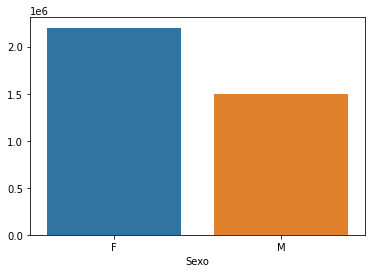

In [222]:
sns.countplot(enem['TP_SEXO'])
plt.xlabel('Sexo')
plt.ylabel("")
plt.show()

In [144]:
enem['TP_COR_RACA'].value_counts()/enem.shape[0]*100

Parda      45.76
Branca     37.14
Preta      12.24
Amarela     2.29
NA          1.98
Indígena    0.58
Name: TP_COR_RACA, dtype: float64

C:\Users\Carlos\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


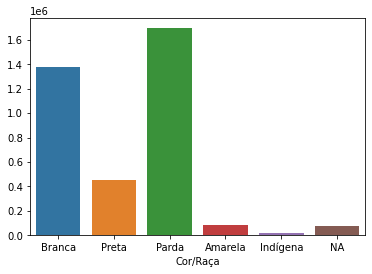

In [145]:
sns.countplot(enem['TP_COR_RACA'])
plt.xlabel('Cor/Raça')
plt.ylabel("")
plt.show()

C:\Users\Carlos\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


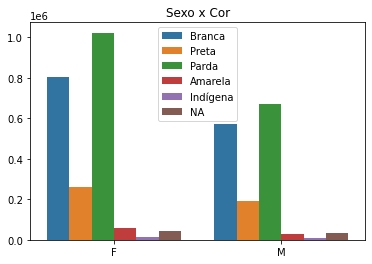

In [146]:
sns.countplot(enem['TP_SEXO'],hue=enem['TP_COR_RACA'], dodge=True)
plt.title('Sexo x Cor')
plt.xlabel('')
plt.ylabel("")
plt.legend(loc='best')
plt.show()

C:\Users\Carlos\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


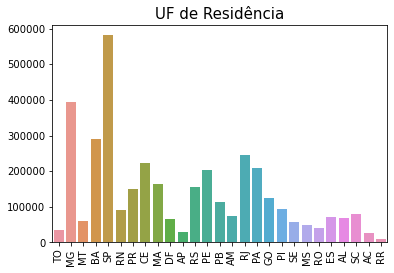

In [147]:
sns.countplot(enem['SG_UF_RESIDENCIA'], orient='h')
plt.title('UF de Residência', size=15)
plt.xticks(rotation=90)
plt.xlabel("")
plt.ylabel("")
plt.show()

In [148]:
#Possui internet em casa?
enem['Q025'].value_counts()/enem.shape[0]*100

Sim   78.88
Não   21.12
Name: Q025, dtype: float64

In [149]:
#Escolaridade da mãe
enem['Q002'].value_counts()/enem.shape[0]*100

Não completou ES   33.35
Não completou EF   27.64
Não completou EM   12.85
Graduada           11.24
Pós-graduada        9.00
Nunca estudou       3.27
Não sabe            2.64
Name: Q002, dtype: float64

In [150]:
#Escolaridade do pai
enem['Q001'].value_counts()/enem.shape[0]*100

Não completou EF   34.26
Não completou ES   27.18
Não completou EM   11.70
Graduada            8.33
Não sabe            8.27
Pós-graduada        5.23
Nunca estudou       5.03
Name: Q001, dtype: float64

C:\Users\Carlos\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


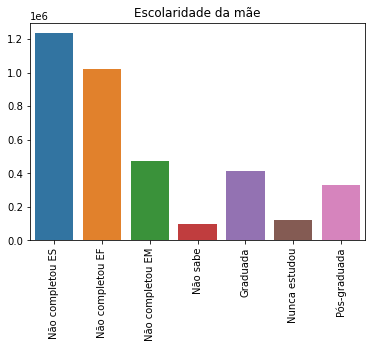

In [151]:
sns.countplot(enem['Q002'])
plt.title('Escolaridade da mãe')
plt.xticks(rotation=90)
plt.xlabel("")
plt.ylabel("")
plt.show()

C:\Users\Carlos\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


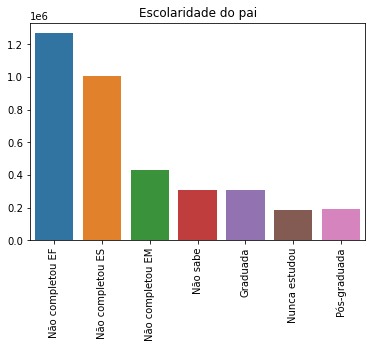

In [152]:
sns.countplot(enem['Q001'])
plt.title('Escolaridade do pai')
plt.xticks(rotation=90)
plt.xlabel("")
plt.ylabel("")
plt.show()

In [153]:
#Renda da familia, incluindo a do aluno
enem['Q006'].value_counts()/enem.shape[0]*100

Até 1.320        48.55
Até 3.520        29.97
Até 10.560       13.85
Nenhuma renda     4.27
Mais de 10.560    3.37
Name: Q006, dtype: float64

C:\Users\Carlos\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


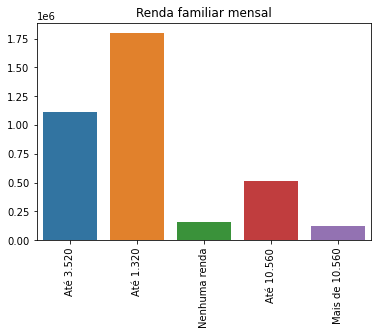

In [154]:
sns.countplot(enem['Q006'])
plt.title('Renda familiar mensal')
plt.xticks(rotation=90)
plt.xlabel("")
plt.ylabel("")
plt.show()

C:\Users\Carlos\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Idade')

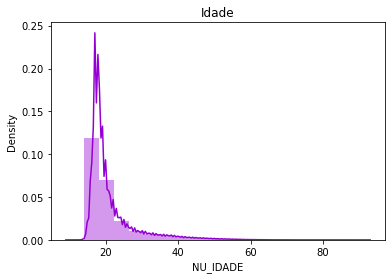

In [155]:
sns.distplot(enem['NU_IDADE'], bins=20, rug=False, color='darkviolet').set_title('Idade')

In [156]:
print('Menor idade {:,.0f}'.format(enem['NU_IDADE'].min()))

Menor idade 10


In [157]:
print('Maior idade {:,.0f}'.format(enem['NU_IDADE'].max()))

Maior idade 92


In [158]:
enem.describe()

,NU_IDADE,NU_NOTA_MT,NU_NOTA_CH,NU_NOTA_REDACAO,NU_NOTA_CN
count,"3,701,947.00","3,701,947.00","3,701,947.00","3,701,947.00","3,701,947.00"
mean,21.17,523.19,509.89,579.77,477.88
std,6.95,109.03,80.98,182.51,76.05
min,10.00,0.00,0.00,0.00,0.00
25%,17.00,435.20,450.80,500.00,417.80
50%,19.00,501.10,513.40,580.00,470.30
75%,22.00,597.90,568.60,680.00,533.20
max,92.00,985.50,835.10,"1,000.00",860.90


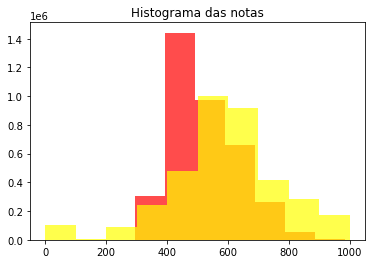

In [180]:
plt.hist(enem['NU_NOTA_MT'], alpha=0.7, color='red')
plt.hist(enem['NU_NOTA_REDACAO'], alpha=0.7, color='yellow')
plt.title('Histograma das notas')
plt.show()

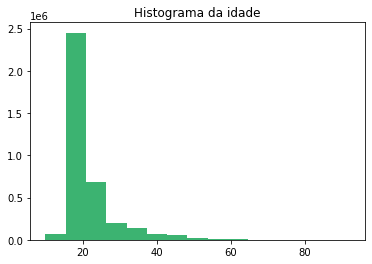

In [160]:
plt.hist(enem['NU_IDADE'],bins=15, histtype='bar', color='#3CB371')
plt.title('Histograma da idade')
plt.show()

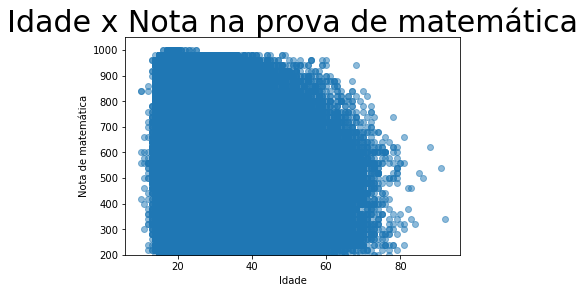

In [161]:
plt.scatter(enem['NU_IDADE'], enem['NU_NOTA_REDACAO'], alpha=0.5)
plt.title("Idade x Nota na prova de matemática", size=30)
plt.xlabel("Idade")
plt.ylabel("Nota de matemática")
plt.ylim(200) #ignorando as notas = 0
plt.show()

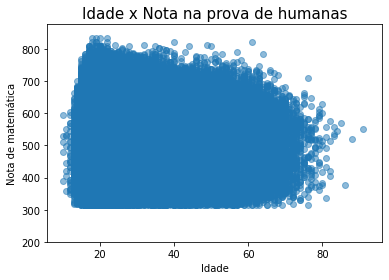

In [162]:
plt.scatter(enem['NU_IDADE'], enem['NU_NOTA_CH'], alpha=0.5)
plt.title("Idade x Nota na prova de humanas", size=15)
plt.xlabel("Idade")
plt.ylabel("Nota de matemática")
plt.ylim(200) #ignorando as notas = 0
plt.show()

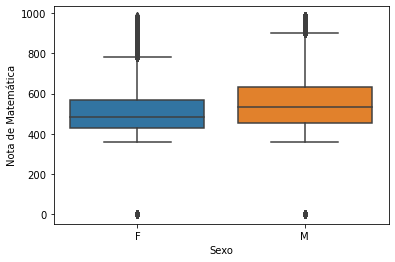

In [163]:
sns.boxplot(x=enem['TP_SEXO'], y=enem['NU_NOTA_MT'])
plt.xlabel("Sexo")
plt.ylabel("Nota de Matemática")
plt.show()

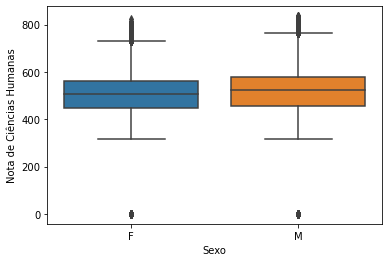

In [164]:
sns.boxplot(x=enem['TP_SEXO'], y=enem['NU_NOTA_CH'])
plt.xlabel("Sexo")
plt.ylabel("Nota de Ciências Humanas")
plt.show()

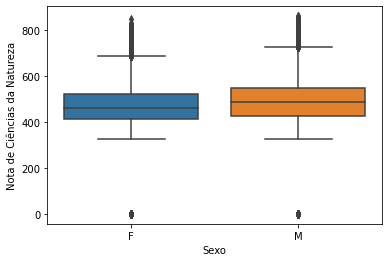

In [165]:
sns.boxplot(x=enem['TP_SEXO'], y=enem['NU_NOTA_CN'])
plt.xlabel("Sexo")
plt.ylabel("Nota de Ciências da Natureza")
plt.show()

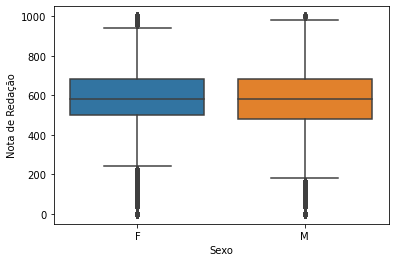

In [166]:
sns.boxplot(x=enem['TP_SEXO'], y=enem['NU_NOTA_REDACAO'])
plt.xlabel("Sexo")
plt.ylabel("Nota de Redação")
plt.show()

In [167]:
from scipy import stats
from statsmodels.stats import diagnostic

In [168]:
sexo = enem[['TP_SEXO', 'NU_NOTA_MT']]
sexo_f = sexo.query('TP_SEXO == "F"').drop('TP_SEXO',axis=1).dropna()
sexo_m = sexo.query('TP_SEXO == "M"').drop('TP_SEXO',axis=1).dropna()
print(sexo_f.shape[0])
print(sexo_m.shape[0])

2201184
1500763


In [169]:
# Teste U de Mann–Whitney: são estatisticamente diferentes!
stats.mannwhitneyu(sexo_f, sexo_m, alternative='two-sided')

MannwhitneyuResult(statistic=array([1.30135795e+12]), pvalue=array([0.]))

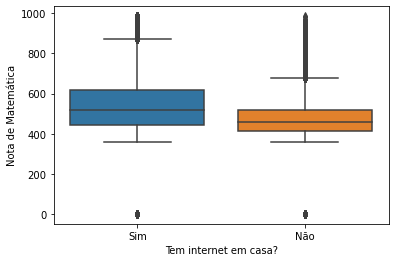

In [170]:
sns.boxplot(x=enem['Q025'], y=enem['NU_NOTA_MT'])
plt.xlabel("Tem internet em casa?")
plt.ylabel("Nota de Matemática")
plt.show()

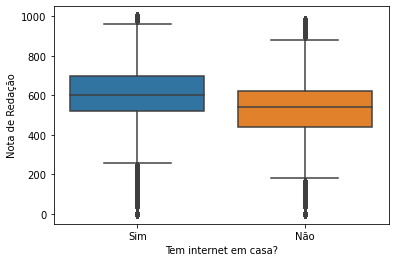

In [171]:
sns.boxplot(x=enem['Q025'], y=enem['NU_NOTA_REDACAO'])
plt.xlabel("Tem internet em casa?")
plt.ylabel("Nota de Redação")
plt.show()

In [172]:
internet = enem[['Q025', 'NU_NOTA_MT']]
internet_n = internet.query('Q025 == "Não"').drop('Q025',axis=1).dropna()
internet_s = internet.query('Q025 == "Sim"').drop('Q025',axis=1).dropna()
print(internet_n.shape[0])
print(internet_s.shape[0])

781961
2919986


In [173]:
# Teste U de Mann–Whitney: são estatisticamente diferentes!
stats.mannwhitneyu(internet_n, internet_s, alternative='two-sided')

MannwhitneyuResult(statistic=array([7.70686971e+11]), pvalue=array([0.]))

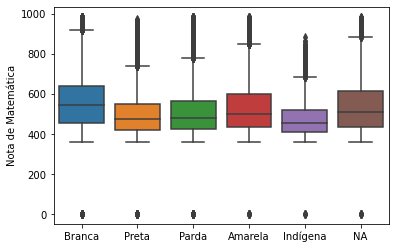

In [174]:
sns.boxplot(x=enem['TP_COR_RACA'], y=enem['NU_NOTA_MT'])
plt.xlabel("")
plt.ylabel("Nota de Matemática")
plt.show()

In [175]:
raca = enem[['TP_COR_RACA', 'NU_NOTA_MT']]
raca_b = raca.query('TP_COR_RACA == "Branca"').drop('TP_COR_RACA',axis=1).dropna()
raca_pa = raca.query('TP_COR_RACA == "Parda"').drop('TP_COR_RACA',axis=1).dropna()
raca_pr = raca.query('TP_COR_RACA == "Preta"').drop('TP_COR_RACA',axis=1).dropna()
raca_a = raca.query('TP_COR_RACA == "Amarela"').drop('TP_COR_RACA',axis=1).dropna()
raca_i = raca.query('TP_COR_RACA == "Indígena"').drop('TP_COR_RACA',axis=1).dropna()

print(raca_b.shape[0])
print(raca_pa.shape[0])
print(raca_pr.shape[0])
print(raca_a.shape[0])
print(raca_i.shape[0]) 

1374887
1694136
453218
84752
21522


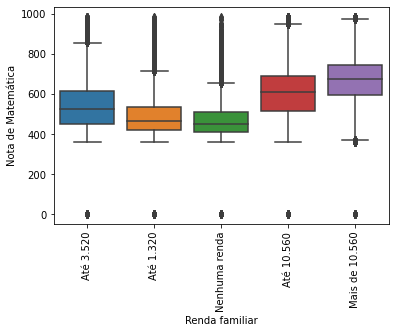

In [176]:
sns.boxplot(x=enem['Q006'], y=enem['NU_NOTA_MT'])
plt.xticks(rotation=90)
plt.xlabel("Renda familiar")
plt.ylabel("Nota de Matemática")
plt.show()

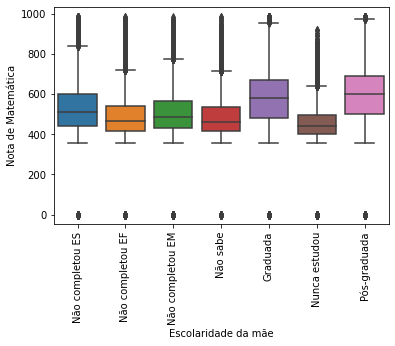

In [177]:
sns.boxplot(x=enem['Q002'], y=enem['NU_NOTA_MT'])
plt.xticks(rotation=90)
plt.xlabel("Escolaridade da mãe")
plt.ylabel("Nota de Matemática")
plt.show()

In [216]:
    estado_regiao = {
    'RS': 'SUL',
    'SC': 'SUL',
    'PR': 'SUL',
    'SP': 'SUDESTE',
    'RJ': 'SUDESTE',
    'MG': 'SUDESTE',
    'ES': 'SUDESTE',
    'AL': 'NORDESTE',
    'BA': 'NORDESTE',    
    'CE': 'NORDESTE',
    'MA': 'NORDESTE',    
    'PI': 'NORDESTE',
    'PE': 'NORDESTE',    
    'RN': 'NORDESTE',
    'SE': 'NORDESTE',
    'PB': 'NORDESTE',
    'AC': 'NORTE',    
    'AM': 'NORTE',  
    'AP': 'NORTE',    
    'PA': 'NORTE',  
    'RO': 'NORTE',    
    'RR': 'NORTE',  
    'TO': 'NORTE',    
    'GO': 'CENTRO-OESTE',
    'MT': 'CENTRO-OESTE',
    'MS': 'CENTRO-OESTE',
    'DF': 'CENTRO-OESTE'
    }

In [217]:
enem['REGIAO_UF'] = enem['SG_UF_RESIDENCIA'].map(estado_regiao)

C:\Users\Carlos\AppData\Local\Temp/ipykernel_7676/3486076878.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  enem['REGIAO_UF'] = enem['SG_UF_RESIDENCIA'].map(estado_regiao)


In [218]:
enem.tail()

,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,NU_NOTA_MT,NU_NOTA_CH,NU_NOTA_REDACAO,NU_NOTA_CN,Q025,Q001,Q006,Q002,REGIAO_UF
5095257,MT,20.00,M,1,531.10,427.30,540.00,391.20,B,B,G,E,CENTRO-OESTE
5095259,PI,37.00,F,4,423.40,485.90,480.00,414.60,A,A,C,A,NORDESTE
5095260,SP,17.00,F,1,390.70,407.40,460.00,370.30,A,E,B,E,SUDESTE
5095263,PA,33.00,F,3,498.30,507.80,540.00,499.60,A,H,E,E,NORTE
5095264,SP,17.00,F,3,389.50,475.00,280.00,409.00,B,H,D,E,SUDESTE


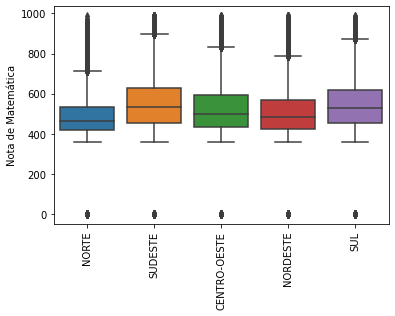

In [219]:
sns.boxplot(x=enem['REGIAO_UF'], y=enem['NU_NOTA_MT'])
plt.xticks(rotation=90)
plt.xlabel("")
plt.ylabel("Nota de Matemática")
plt.show()

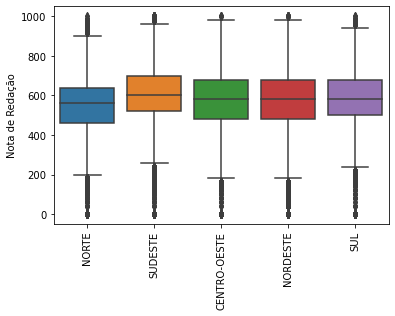

In [221]:
sns.boxplot(x=enem['REGIAO_UF'], y=enem['NU_NOTA_REDACAO'])
plt.xticks(rotation=90)
plt.xlabel("")
plt.ylabel("Nota de Redação")
plt.show()